In [3]:
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns

# Question 1. What data do you have?

### Expain Here:

We have numerical and cateogrical data which we are using to analyze the question whether the stereotypes of introverts and extroverts are true. We are exmaining data regarding students' GPA, club activity, number of siblings, major, and academics to determine if any of these data have an effect on whether a person is an introvert or extrovert. 

In [4]:
raw_df = pd.read_csv("survey_responses.csv")
df1 = raw_df.drop(raw_df.columns[[0, 1, 2, 3, 4, 5, 6, 10, 11, 12, 13, 16, 17, 18, 19, 21, 23, 24, 25, 26, 30, 31, 32, 33, 34, 35, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 80, 81, 82, 83]],axis = 1)

### Clean Up Dataframe

In [5]:
df1.loc[:,'75. What energizes you?'] = df1.loc[:,'75. What energizes you?'].fillna(0)
df1.loc[:,'14. What is your major?'] = df1.loc[:,'14. What is your major?'].fillna("Unknown")
df2 = df1.replace(['Computational Mathematics','Computational Mathematics ', 'Computational Math', 'computational mathmatics','Mathematics ', "Math", 'Mathematics for Teaching Secondary School', 'Mathematics'], 'Computational Mathematics/Mathematics')
df2 = df2.replace(['Computer Science', 'Computer Science with Business Applications'], "ENCS/CSBA")
df2 = df2.replace('Electrical engineering', 'Electrical Engineering')
df2.rename(columns = {'14. What is your major?':'Major'}, inplace = True)

df2 = df2.replace([-1,-5], 0)
df2.loc[:,'15. What is your current GPA?'] = df2.loc[:,'15. What is your current GPA?'].fillna(0)
df2.loc[:,'20. How many units are you taking currently?'] = df2.loc[:,'20. How many units are you taking currently?'].fillna(0)
df2.loc[:,'22. How often do you attend lectures?'] = df2.loc[:,'22. How often do you attend lectures?'].fillna(0)
df2.loc[:,'27. How many times a week do you attend office hours on average?'] = df2.loc[:,'27. How many times a week do you attend office hours on average?'].fillna(0)
df2.loc[:,'28. On average, how many hours do you study per week? (excluding homework)'] = df2.loc[:,'28. On average, how many hours do you study per week? (excluding homework)'].fillna(0)
df2.loc[:,'29. On average, how many hours do you spend on homework per week?'] = df2.loc[:,'29. On average, how many hours do you spend on homework per week?'].fillna(0)
df2.fillna(0)
df2.rename(columns = {'15. What is your current GPA?':'GPA', '20. How many units are you taking currently?': 'Current Units Taken', '22. How often do you attend lectures?': 'Lecture Attendance', '27. How many times a week do you attend office hours on average?': 'Office Hours Attendance', '28. On average, how many hours do you study per week? (excluding homework)': 'Hours Spent on Studying (exc. HW)', '29. On average, how many hours do you spend on homework per week?': 'Hours Spent on Homework per Week', '60. On average, how many hours do you use social media per day?' : 'Social media usage per hour per day', '61. On average, how many hours do you spend watching movies per week?': 'Hours per day watching movies per week', '62. On average, how many hours do you listen to music per day?':'Hours listening to music per day','63. On average, how many hours do you play video games per week?': 'Hours playing video games per week'}, inplace = True)
df2['Study Hours'] = df2['Hours Spent on Homework per Week'] + df2['Hours Spent on Studying (exc. HW)']

In [6]:
df2

,7. How many siblings do you have?,"8. Are you a first, middle, last, or only child?","9. How often do you talk with your siblings (through text, phone calls, or other means)?",Major,GPA,Current Units Taken,Lecture Attendance,Office Hours Attendance,Hours Spent on Studying (exc. HW),Hours Spent on Homework per Week,...,Social media usage per hour per day,Hours per day watching movies per week,Hours listening to music per day,Hours playing video games per week,75. What energizes you?,76. How often do you initiate conversations in group settings?,"77. When going out, which of the following would you most prefer?",78. How do you decline invites to go out?,79. What's the first thing you do when facing a problem with your work?,Study Hours
0,1.0,First,Less than once a week,ENCS/CSBA,3.0 - 3.49,20.0,4.0,0.0,7.0,7.0,...,3.0,2.0,4.0,20.0,2.0,3.0,Having a plan but only following it loosely,Making up an excuse,Research potential solutions online,14.0
1,2.0,Middle,Almost every day,ENCS/CSBA,3.5 - 4.0,13.0,5.0,0.0,6.0,6.0,...,1.0,1.0,4.0,1.0,3.0,5.0,Having a well thought out itinerary,Politely declining,Give up and try again later,12.0
2,2.0,Middle,Once or twice a week,Neuroscience,3.5 - 4.0,12.0,5.0,0.0,7.0,4.0,...,2.0,1.0,2.0,5.0,2.0,3.0,Having a plan but only following it loosely,Apologize for not being able to go,Research potential solutions online,11.0
3,1.0,First,Almost every day,ENCS/CSBA,3.0 - 3.49,16.0,5.0,0.0,1.0,8.0,...,3.0,3.0,1.0,10.0,1.0,2.0,Having a well thought out itinerary,Making up an excuse,Research potential solutions online,9.0
4,1.0,First,Once or twice a week,ENCS/CSBA,3.5 - 4.0,16.0,5.0,0.0,4.0,10.0,...,1.0,1.0,2.0,10.0,4.0,5.0,Having a plan but only following it loosely,Politely declining,"Ask a TA, tutor, or professor for help",14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,1.0,Last,Less than once a week,ENCS/CSBA,3.0 - 3.49,12.0,4.0,0.0,4.0,8.0,...,4.0,2.0,4.0,0.0,3.0,3.0,Having a plan but only following it loosely,Saying you'll get back to them,Research potential solutions online,12.0
220,2.0,Last,Almost every day,ENCS/CSBA,3.0 - 3.49,13.0,5.0,1.0,12.0,15.0,...,1.0,3.0,2.0,6.0,3.0,4.0,Doing whatever seems right or fun at the moment,Politely declining,Give up and try again later,27.0
221,1.0,Last,Three or four times a week,ENCS/CSBA,2.5 - 2.99,13.0,3.0,0.0,10.0,10.0,...,5.0,2.0,20.0,5.0,4.0,4.0,Having a plan but only following it loosely,Politely declining,"Ask a TA, tutor, or professor for help",20.0
222,5.0,Last,Almost every day,ENCS/CSBA,3.5 - 4.0,17.0,5.0,0.0,10.0,10.0,...,1.0,2.0,4.0,1.0,1.0,3.0,Having a plan but only following it loosely,Apologize for not being able to go,"Ask a TA, tutor, or professor for help",20.0


# 2. What would you like to know?

Based on the data collected from CS105 and CS111 classes, are the stereotypes of introverts and extroverts true?

# 3. Explore the data.

### Bar Graph

In this section, a bar graph is used to visualize how many students see themselves as extrovert, introvert or ambivert.

In [7]:
#Created a new column called "Personality" based on Q75
df2.loc[(df2["75. What energizes you?"] >= 4, "Personality")] = 'Extrovert'
df2.loc[(df2["75. What energizes you?"] == 3, "Personality")] = 'Ambivert'
df2.loc[(df2["75. What energizes you?"] <= 2, "Personality")] = 'Introvert'
df2.loc[(df2["75. What energizes you?"] == 0, "Personality")] = 'Unknown'

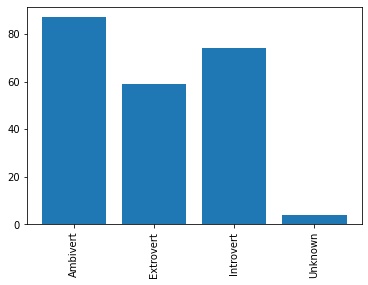

In [8]:
#Bar Graph to Show How the Distribution of Personality from the entire data
personalityCount = df2.groupby("Personality")["Major"].count()
plt.bar(personalityCount.index,personalityCount)
plt.xticks(rotation=90)
plt.show()

### Joint Distribution

In this section, a joint distribution is used to see whether a major has an affect on the person's personality. 

In [9]:
#Distribution of Personality based on Major
countByMajor = df2.pivot_table(
    index="Major", columns="Personality",
    values="Current Units Taken", 
    aggfunc="count",
    fill_value=0
)
countByMajor

Personality,Ambivert,Extrovert,Introvert,Unknown
Major,,,,
Business Admin,1,0,0,0
Chemical Engineering,1,0,0,0
Chemistry,1,0,0,0
Computational Mathematics/Mathematics,4,0,5,0
Computer Engineering,8,5,7,0
Data Science,16,5,6,0
ENCS/CSBA,54,48,51,4
Electrical Engineering,0,0,1,0
Neuroscience,0,0,2,0


In [10]:
#Joint Probability Distribution
joint_prob = pd.crosstab(df2["Major"], df2["Personality"], normalize=True)
joint_prob

Personality,Ambivert,Extrovert,Introvert,Unknown
Major,,,,
Business Admin,0.004464,0.000000,0.000000,0.000000
Chemical Engineering,0.004464,0.000000,0.000000,0.000000
Chemistry,0.004464,0.000000,0.000000,0.000000
Computational Mathematics/Mathematics,0.017857,0.000000,0.022321,0.000000
Computer Engineering,0.035714,0.022321,0.031250,0.000000
Data Science,0.071429,0.022321,0.026786,0.000000
ENCS/CSBA,0.241071,0.214286,0.227679,0.017857
Electrical Engineering,0.000000,0.000000,0.004464,0.000000
Neuroscience,0.000000,0.000000,0.008929,0.000000


<AxesSubplot:xlabel='Personality', ylabel='Major'>

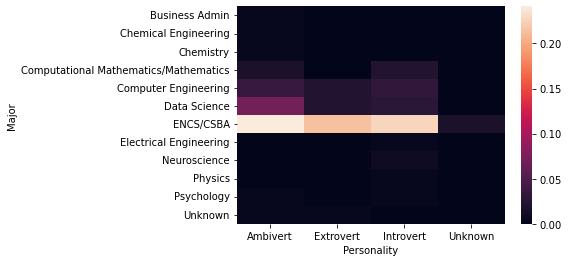

In [11]:
sns.heatmap(joint_prob)

To visualize the data more clearly, a heatmap is used and it could be seen that most of these subjects are in ENCS/CSBA and mostly see themselves as ambivert. However, if we were to ignore the ambivert column ,it could be seen that more people are introverts rather than extroverts. 

# Radar Chart

In [12]:
#Radar Chart showing Academic Performance based on Personality
# 15. What is your current GPA?
# 20. How many units are you taking currently?
# 22. How often do you attend lectures?
# 27. How many times a week do you attend office hours on average?
# 28. On average, how many hours do you study per week? (excluding homework)
# 29. On average, how many hours do you spend on homework per week?

df3 = pd.DataFrame({'Personality' : df2['Personality'], 'GPA': df2['GPA'], 'Current Units Taken': df2['Current Units Taken'], 'Total Study Hours': df2['Study Hours'], 'Lecture Attendance': df2['Lecture Attendance'], 'Office Hours Attendance': df2['Office Hours Attendance']})
# df3


In [13]:
df3 = df3.replace('0 - 1.49', 0.75)
df3 = df3.replace('1.5 - 1.99', 1.75)
df3 = df3.replace('2.0 - 2.49', 2.25)
df3 = df3.replace('2.5 - 2.99', 2.75)
df3 = df3.replace('3.0 - 3.49', 3.25)
df3 = df3.replace('3.5 - 4.0', 3.75)
df3_mean = df3.groupby('Personality').mean()
df3_mean
df3_new = pd.DataFrame({'Personality' : df3_mean.index, 'GPA': df3_mean['GPA'], 'Current Units Taken': df3_mean['Current Units Taken'], 'Total Study Hours': df3_mean['Total Study Hours'], 'Lecture Attendance': df3_mean['Lecture Attendance'], 'Office Hours Attendance': df3_mean['Office Hours Attendance']}).reset_index(drop=True)
df3_new


,Personality,GPA,Current Units Taken,Total Study Hours,Lecture Attendance,Office Hours Attendance
0,Ambivert,3.316092,14.229885,16.735632,4.126437,0.793103
1,Extrovert,3.309322,15.322034,21.627119,4.152542,0.694915
2,Introvert,3.432432,14.486486,16.445946,4.324324,0.567568
3,Unknown,3.375000,14.750000,3.500000,2.750000,0.250000


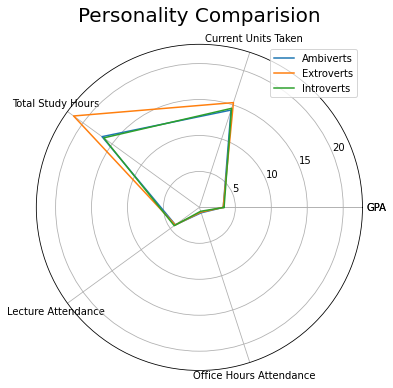

In [14]:
categories=np.array(['GPA', 'Current Units Taken', 'Total Study Hours', 'Lecture Attendance', 'Office Hours Attendance'])
categories = [*categories, categories[0]]

a_stats=df3_new.loc[0,categories].values
e_stats=df3_new.loc[1,categories].values
i_stats=df3_new.loc[2,categories].values

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(a_stats))

plt.figure(figsize=(6, 6))
plt.subplot(polar=True)
plt.plot(label_loc, a_stats, label='Ambiverts')
plt.plot(label_loc, e_stats, label='Extroverts')
plt.plot(label_loc, i_stats, label='Introverts')
plt.title('Personality Comparision', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

<AxesSubplot:xlabel='Personality'>

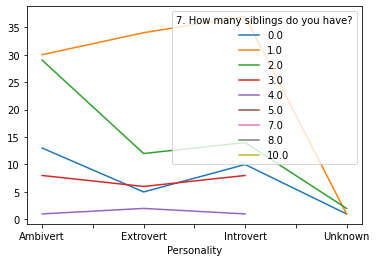

In [15]:
#Mihika
#correlation between whether or not a student is an only child and their personality trait.
#q7,8,9
df4 = df2.groupby(['Personality','7. How many siblings do you have?']).size()
df4 = df4.unstack()
df4.plot(kind="line")

For the first visualization, we group the data with the response of the question: How many siblings do you have? And their personality type. In this scenario, we are looking at the size of the dataset (count of each personality type with each response of to the question). Then we use pandas inbuilt function plot to plot the data in the notebook and show the visualization. Through this graph, we can observe the blue line (which shows person has 0 siblings) doesn’t really have a correlation on which personality type you are. It’s symmetrical and we see that being an only child has little to no effect on your personality type.

<AxesSubplot:xlabel='Personality'>

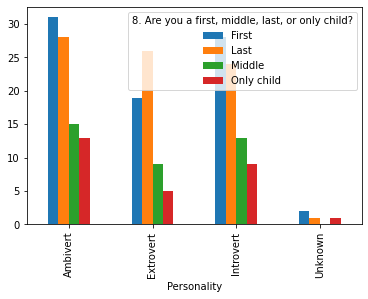

In [16]:
df4 = df2.groupby(['Personality','8. Are you a first, middle, last, or only child?']).size()
df4 = df4.unstack()
df4.plot(kind="bar")

For the second visualization, we group the data with the response of the question: Are you a first, middle or only child? And their personality type. In this scenario, we are looking at the size of the dataset (count of each personality type with each response of to the question). Then we use pandas inbuilt function plot to plot the data in the notebook and show the visualization. Through this graph, we can observe the red bar (which shows person is only child) doesn’t really have a correlation on which personality type you are again. We can see a similar bar graph trend for all variables: first, middle and only child.

<AxesSubplot:xlabel='Personality'>

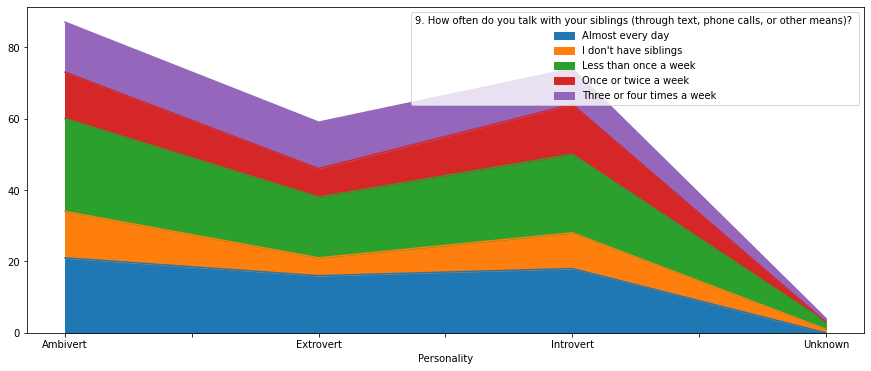

In [17]:
df4 = df2.groupby(['Personality', '9. How often do you talk with your siblings (through text, phone calls, or other means)? ']).size()
df4 = df4.unstack()
df4.plot(figsize=(15,6),kind="area")

For the third visualization, we group the data with the response of the question: How often do you talk to your siblings? And their personality type. In this scenario, we are looking at the size of the dataset (count of each personality type with each response of to the question). Then we use pandas inbuilt function plot to plot the data in the notebook and show the visualization. Through this graph, we can observe the orange area (which shows person has 0 siblings) doesn’t really have a correlation on which personality type you are again. The trend of the area is somewhat similar to those people who have siblings as well. 

In [18]:
#Hypothesis testing for question 4: There is not a correlation between social activity and personality trait. They are independent.
#Questions 60, 61, 62, 63
df5 = pd.DataFrame({'Personality' : df2['Personality'], 'Average social media usage per hour per day': df2['Social media usage per hour per day'], 'Average hours per day watching movies per week': df2['Hours per day watching movies per week'], 'Average hours listening to music per day': df2['Hours listening to music per day'], 'Average hours playing video games per week': df2['Hours playing video games per week']})
df5 = df5.drop(df5.index[155])
df5

,Personality,Average social media usage per hour per day,Average hours per day watching movies per week,Average hours listening to music per day,Average hours playing video games per week
0,Introvert,3.0,2.0,4.0,20.0
1,Ambivert,1.0,1.0,4.0,1.0
2,Introvert,2.0,1.0,2.0,5.0
3,Introvert,3.0,3.0,1.0,10.0
4,Extrovert,1.0,1.0,2.0,10.0
...,...,...,...,...,...
219,Ambivert,4.0,2.0,4.0,0.0
220,Ambivert,1.0,3.0,2.0,6.0
221,Extrovert,5.0,2.0,20.0,5.0
222,Introvert,1.0,2.0,4.0,1.0


In [19]:
df5_mean = df5.groupby('Personality').mean()
df5_mean

,Average social media usage per hour per day,Average hours per day watching movies per week,Average hours listening to music per day,Average hours playing video games per week
Personality,,,,
Ambivert,3.282353,1.823529,5.360465,6.671765
Extrovert,4.000000,2.189655,6.232143,5.448276
Introvert,3.219178,2.222222,4.405405,7.863014
Unknown,4.000000,0.000000,3.000000,2.000000


<AxesSubplot:xlabel='Personality'>

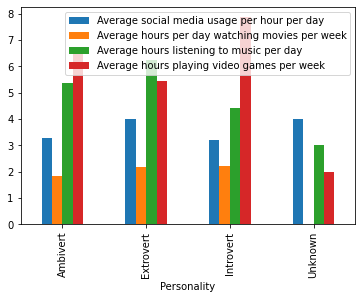

In [20]:
df5_mean.plot(kind = "bar")

In [21]:
dfcst1 = pd.DataFrame({'Personality' : df2['Personality'], 'Average social media usage per hour per day': df2['Social media usage per hour per day'], 'Average hours playing video games per week': df2['Hours playing video games per week']})
dfcst1 = dfcst1.drop(dfcst1.index[155])
dfcst1.head()

,Personality,Average social media usage per hour per day,Average hours playing video games per week
0,Introvert,3.0,20.0
1,Ambivert,1.0,1.0
2,Introvert,2.0,5.0
3,Introvert,3.0,10.0
4,Extrovert,1.0,10.0


In [22]:
dfcst2 = pd.DataFrame({'Personality' : df2['Personality'], 'Average hours per day watching movies per week': df2['Hours per day watching movies per week'], 'Average hours listening to music per day': df2['Hours listening to music per day']})
dfcst2 = dfcst2.drop(dfcst2.index[155])
dfcst2.head()

,Personality,Average hours per day watching movies per week,Average hours listening to music per day
0,Introvert,2.0,4.0
1,Ambivert,1.0,4.0
2,Introvert,1.0,2.0
3,Introvert,3.0,1.0
4,Extrovert,1.0,2.0


In [23]:
dfcst1_mean = dfcst1.groupby('Personality').mean()
print(dfcst1_mean)

dfcst2_mean = dfcst2.groupby('Personality').mean()
print(dfcst2_mean)

             Average social media usage per hour per day  \
Personality                                                
Ambivert                                        3.282353   
Extrovert                                       4.000000   
Introvert                                       3.219178   
Unknown                                         4.000000   

             Average hours playing video games per week  
Personality                                              
Ambivert                                       6.671765  
Extrovert                                      5.448276  
Introvert                                      7.863014  
Unknown                                        2.000000  
             Average hours per day watching movies per week  \
Personality                                                   
Ambivert                                           1.823529   
Extrovert                                          2.189655   
Introvert                              

In [24]:
cst1 = dfcst1_mean.mean(axis=1)
cst1 = cst1.drop(["Ambivert", "Unknown"])
print(cst1)
print('\n')
cst2 = dfcst2_mean.mean(axis=1)
cst2 = cst2.drop(["Ambivert", "Unknown"])
print(cst2)

Personality
Extrovert    4.724138
Introvert    5.541096
dtype: float64


Personality
Extrovert    4.210899
Introvert    3.313814
dtype: float64


In [25]:
#chi-squared test
#the cell values are less than 5, so we multiple them by 3 to scale them to use the values

#exin = pd.DataFrame({'Social media interaction': [4.724138,5.541096],'Alone interaction': [4.210899,3.313814]},index=["Extrovert","Introvert"])
#exin = pd.DataFrame({'Social media interaction': [14.172414,16.623288],'Alone interaction': [12.632697,9.941442]},index=["Extrovert","Introvert"])
exin = pd.DataFrame({'Social media interaction': [14.17,16.62],'Alone interaction': [12.63,9.94]},index=["Extrovert","Introvert"])
exin
#cst = df5_mean.mean(axis=1)
#cst

,Social media interaction,Alone interaction
Extrovert,14.17,12.63
Introvert,16.62,9.94


In [26]:
# calculate the chi-square value of the dataset
from scipy.stats import chi2_contingency
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html
chi, p, dfree, expected = chi2_contingency(exin)
print("calculated chi square value: " ,chi)
print("calculated p value: " ,p)
#print("degree of freedom: ", dfree)

calculated chi square value:  0.19375370190937727
calculated p value:  0.6598106354084577


In [27]:
# get the threshold to reject the hypothesis by certain significance value and the degree of the freedom.
from scipy.stats import chi2
print("for 1 degree of freedom, the chi-square value needed to reject the hypothesis at the 0.05 significance level:")
chi2.ppf(0.95, 1)

#we fail to reject the null hypothesis since the chi-square value is less than the value at the significance level 

for 1 degree of freedom, the chi-square value needed to reject the hypothesis at the 0.05 significance level:


3.841458820694124

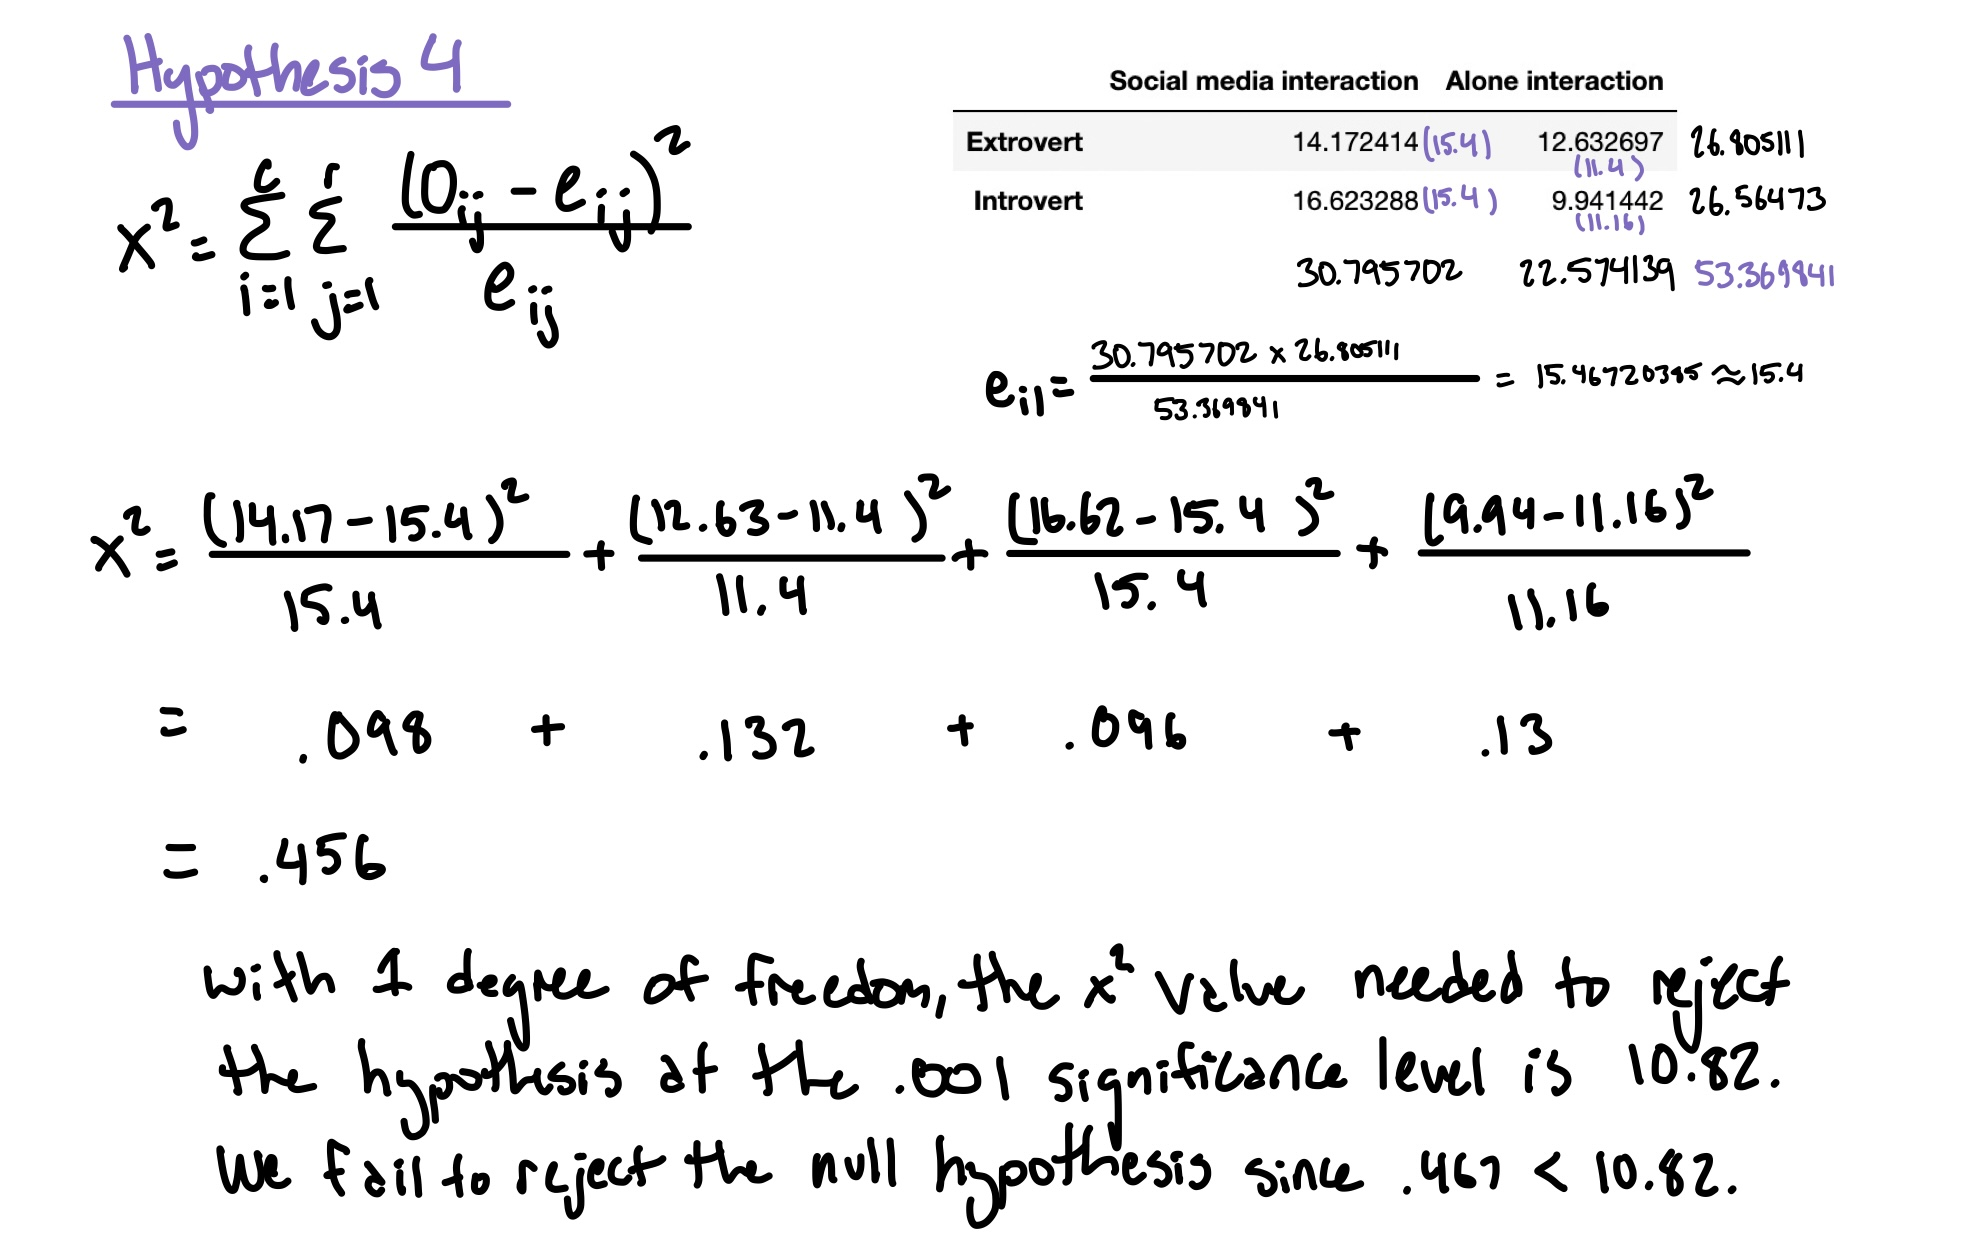

In [28]:
data = pd.crosstab(df2['Personality'], df2['8. Are you a first, middle, last, or only child?']) 
data

"8. Are you a first, middle, last, or only child?",First,Last,Middle,Only child
Personality,,,,
Ambivert,31,28,15,13
Extrovert,19,26,9,5
Introvert,28,24,13,9
Unknown,2,1,0,1


In [29]:
from scipy.stats import chi2_contingency
chi, p, dfree, expected = chi2_contingency(data)
print("calculated chi square value: " ,chi)
print("calculated p value: " ,p)

calculated chi square value:  4.825669781927424
calculated p value:  0.8492325117269548


In [30]:
from scipy.stats import chi2
print("for 1 degree of freedom, the chi-square value needed to reject the hypothesis at the 0.001 significance level:")
chi2.ppf(0.999, 1)

for 1 degree of freedom, the chi-square value needed to reject the hypothesis at the 0.001 significance level:


10.827566170662733

# 4. Can you state any hypotheses or make predictions? Which tests can you apply to verify your hypothesis? 

# 5. Test your hypotheses.

#### 1. There is a correlation between a student’s academic performance and their personality trait. 
Null: Academic performance and personality trait is independent. 
Alternate: Academic performance and personality trait is correlated.
Since introverts are believed to be more reserved and less outgoing, it is assumed that they would spend more time alone thus more time to study. Because of this, it is believed that their academic performance would also be higher. 

#### 2. There is a correlation between whether or not a student is an only child and their personality trait.
Null: A birth order and personality trait is independent. Alternate: A birth order and personality trait is correlated.
For this we used chi-square analysis and with both tests the failed to reject the null hypothesis therefore personality and birth order is independent. As we predicted that the more extroverted would be first or last born and middle or only would be more introverted. The prediction is not true because both of the tests fail to reject.

#### 3. There is a correlation between how many clubs a student participates in and their personality trait.
Null: The number of clubs a student participates in and their personality trait is independent. Alternate: The number of clubs a student participates in and their personality trait is correlated.

#### 4. There is a correlation between social activity and their personality trait. 
Null: Social activity and personality trait is independent. Alternate: Social activity and personality trait is correlated.